In [12]:
# LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
# 1. LOAD DATA WITH PROPER HANDLING
try:
    # Load World Bank dataset (skip metadata rows)
    df = pd.read_csv("API_19_DS2_en_csv_v2_30709.csv", 
                    skiprows=2,
                    encoding='latin1')  # Try 'utf-8' if this fails
    
    # 2. DATA CLEANING
    # Drop empty columns
    df = df.dropna(axis=1, how='all')
    
    # Melt years into rows for analysis
    year_cols = [col for col in df.columns if col.isnumeric()]
    df_clean = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      value_vars=year_cols,
                      var_name='Year',
                      value_name='Value')
    
    # Now you can continue with your analysis
    print("Data cleaned successfully!")
    print(df_clean.head())
    
except Exception as e:
    print(f"Error: {str(e)}")

Error: [Errno 2] No such file or directory: 'API_19_DS2_en_csv_v2_30709.csv'


In [17]:
import os
print("Current working directory:", os.getcwd())
print("Files in directory:", os.listdir())

Current working directory: C:\Users\HP\Downloads\API_19_DS2_en_csv_v2_30709
Files in directory: ['.ipynb_checkpoints', 'Metadata_Country_API_19_DS2_en_csv_v2_30709.csv', 'Metadata_Indicator_API_19_DS2_en_csv_v2_30709.csv', 'Untitled.ipynb', 'WB_COVID_GDP.csv']


In [18]:
import pandas as pd
import os

# 1. LOAD THE DATA
try:
    # Use the exact filename from your directory
    df = pd.read_csv("WB_COVID_GDP.csv", skiprows=2, encoding='latin1')
    
    # 2. VERIFY LOADING
    print("Data loaded successfully! First 5 rows:")
    print(df.head())
    
    # 3. CHECK COLUMNS
    print("\nAvailable columns:")
    print(df.columns.tolist())
    
except Exception as e:
    print(f"Error: {str(e)}")
    print("\nTroubleshooting:")
    print(f"Files in directory: {os.listdir()}")

Data loaded successfully! First 5 rows:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Last Updated Date  \
Country N

In [21]:
# Reload with proper structure
df = pd.read_csv("WB_COVID_GDP.csv", skiprows=4)  # Skip metadata rows
df = df.dropna(how='all', axis=1)  # Remove empty columns

# Verify columns
print("Corrected columns:", df.columns.tolist())

Corrected columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [25]:
# Melt year columns into rows
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
df_long = pd.melt(df, 
                 id_vars=id_vars,
                 var_name='Year',
                 value_name='Value')

# Clean year values
df_long['Year'] = df_long['Year'].str.extract(r'(\d+)')[0].astype(float)  # Note the 'r' prefix

print("\nTransformed data sample:")
print(df_long.head())


Transformed data sample:
  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Urban population (% of total population)   
1        Aruba          ABW                          Urban population   
2        Aruba          ABW        Urban population growth (annual %)   
3        Aruba          ABW                         Population, total   
4        Aruba          ABW              Population growth (annual %)   

      Indicator Code    Year      Value  
0  SP.URB.TOTL.IN.ZS  1960.0     50.776  
1        SP.URB.TOTL  1960.0  27887.000  
2        SP.URB.GROW  1960.0        NaN  
3        SP.POP.TOTL  1960.0  54922.000  
4        SP.POP.GROW  1960.0        NaN  


In [26]:
# First identify available health indicators
health_indicators = df_long[df_long['Indicator Name'].str.contains('health|disease|covid|hiv', case=False)]
print("Potential health indicators:\n", health_indicators['Indicator Name'].unique())

# Select specific metrics (adjust these based on your actual indicators)
target_metrics = [
    'GDP growth (annual %)',
    'Hospital beds (per 1,000 people)',  # Example health metric
    'Current health expenditure (% of GDP)'
]

# Filter and pivot
analysis_df = df_long[df_long['Indicator Name'].isin(target_metrics)]
pivot_df = analysis_df.pivot_table(
    index=['Country Name', 'Year'],
    columns='Indicator Name',
    values='Value'
).reset_index()

# Clean column names
pivot_df.columns = [col.replace(' ', '_') for col in pivot_df.columns]
print("\nFinal analysis table:\n", pivot_df.head())

Potential health indicators:
 ['Community health workers (per 1,000 people)']

Final analysis table:
 Empty DataFrame
Columns: [Country_Name, Year]
Index: []


In [28]:
# Print all unique indicator names
print("Available Indicators:")
print(df_long['Indicator Name'].unique())

# Print indicator codes too for reference
print("\nIndicator Codes:")
print(df_long['Indicator Code'].unique())

Available Indicators:
['Urban population (% of total population)' 'Urban population'
 'Urban population growth (annual %)' 'Population, total'
 'Population growth (annual %)'
 'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Community health workers (per 1,000 people)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Agriculture, forestry, and fishing, value added (% of GDP)'
 'CPIA public sector management and institutions cluster average (1=low to 6=high)'
 'Terrestrial and marine protected areas (% of total territorial area)'
 'Marine protected areas (% of territorial waters)'
 'Terrestrial protected areas (% of total land area)'
 'Annual freshwater withdrawals, total (% of internal resources)'
 'Annual freshwater withdrawals, total (billion cubic mete

In [29]:
# Health indicators
health_metrics = [
    'Mortality rate, under-5 (per 1,000 live births)',
    'Community health workers (per 1,000 people)',
    'Prevalence of underweight, weight for age (% of children under 5)'
]

# Economic indicators
econ_metrics = [
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Foreign direct investment, net inflows (% of GDP)'
]

# Combine and filter
analysis_df = df_long[df_long['Indicator Name'].isin(health_metrics + econ_metrics)]

In [30]:
pivot_df = analysis_df.pivot_table(
    index=['Country Name', 'Year'],
    columns='Indicator Name',
    values='Value'
).reset_index()

# Clean column names
pivot_df.columns = [''.join(c for c in col if c.isalnum()) for col in pivot_df.columns]
print(pivot_df.head())

   CountryName    Year  AgricultureforestryandfishingvalueaddedofGDP  \
0  Afghanistan  1960.0                                           NaN   
1  Afghanistan  1961.0                                           NaN   
2  Afghanistan  1962.0                                           NaN   
3  Afghanistan  1963.0                                           NaN   
4  Afghanistan  1964.0                                           NaN   

   Communityhealthworkersper1000people  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   ForeigndirectinvestmentnetinflowsofGDP  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Mortalityrateunder5per1000livebirths  \


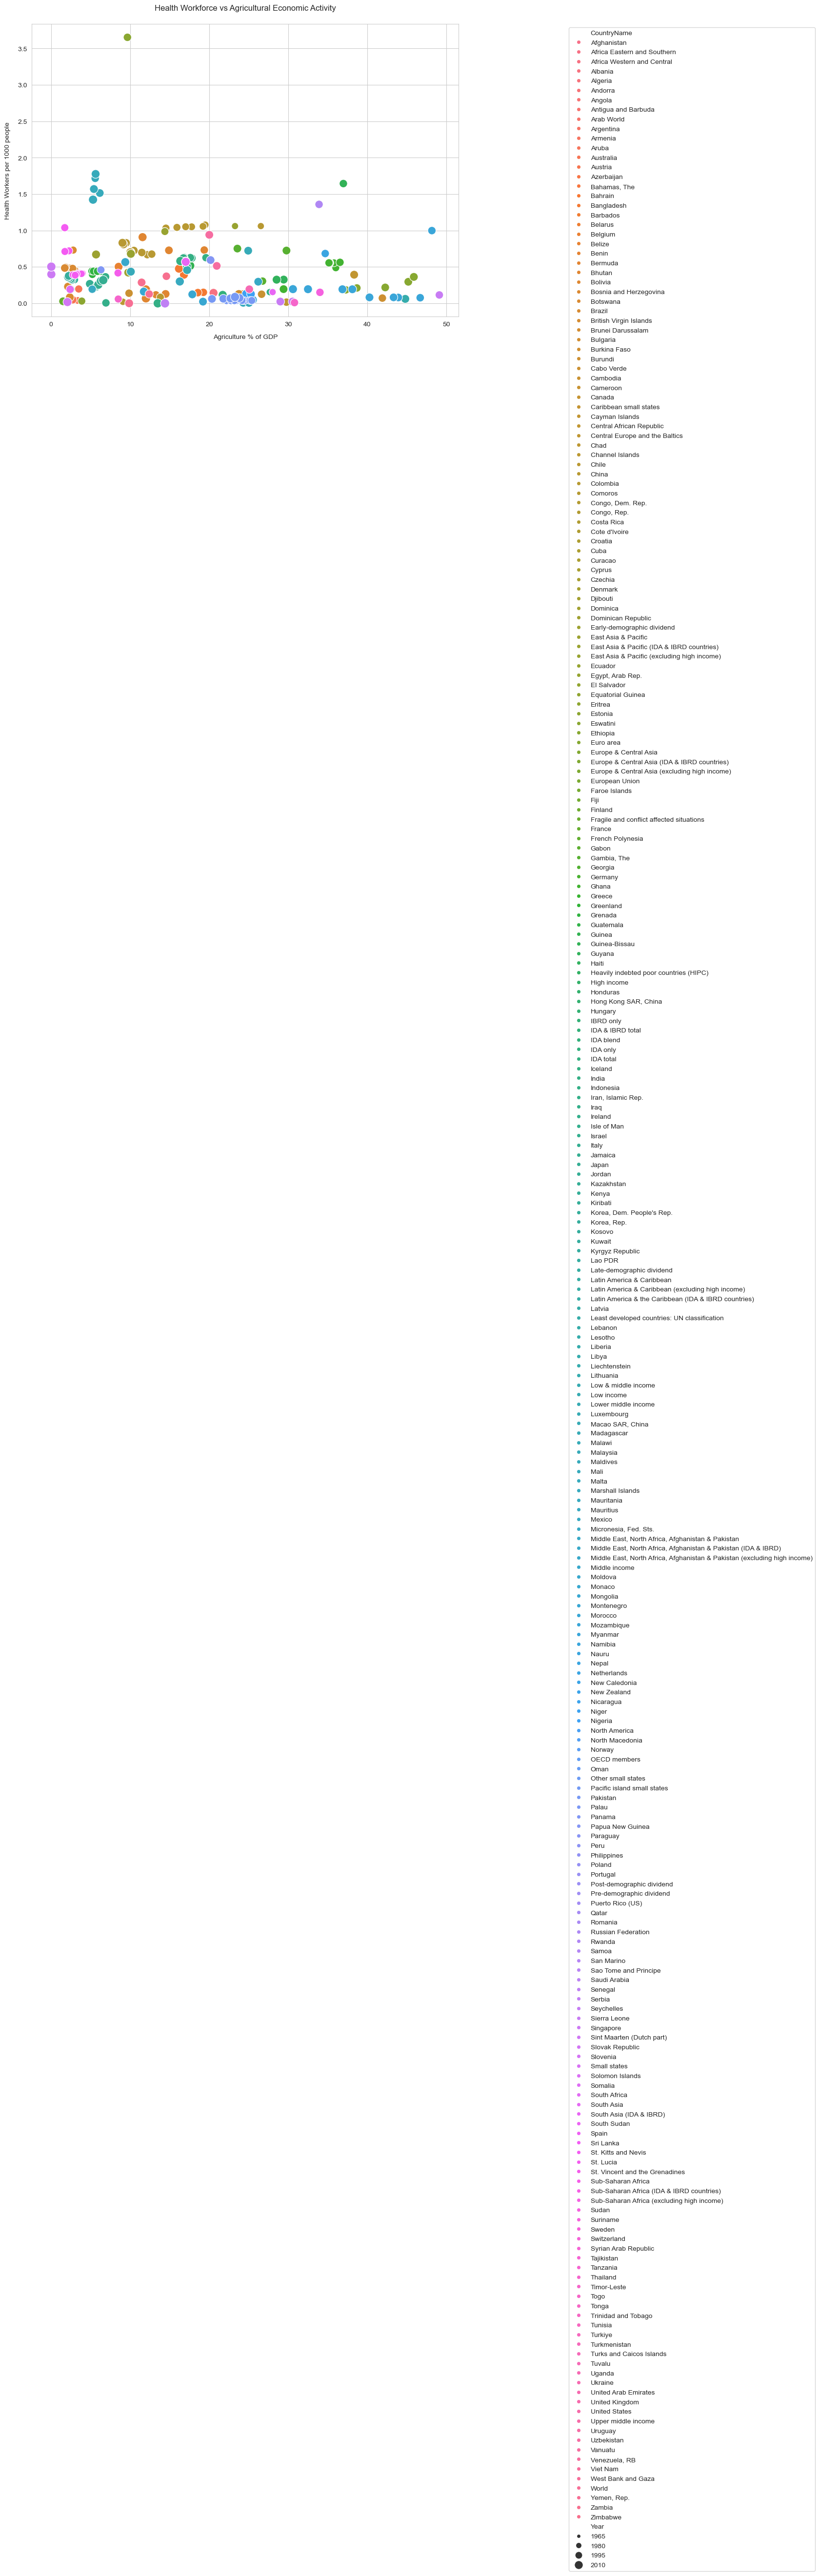

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))  # Increase figure size

sns.scatterplot(
    data=pivot_df,
    x='AgricultureforestryandfishingvalueaddedofGDP',
    y='Communityhealthworkersper1000people',
    hue='CountryName',
    size='Year',
    sizes=(20, 200)
)

plt.title("Health Workforce vs Agricultural Economic Activity", pad=20)
plt.xlabel("Agriculture % of GDP", labelpad=10)
plt.ylabel("Health Workers per 1000 people", labelpad=10)

# Adjust legend and margins
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0.5)
plt.subplots_adjust(right=0.75, top=0.9, bottom=0.15)
plt.show()

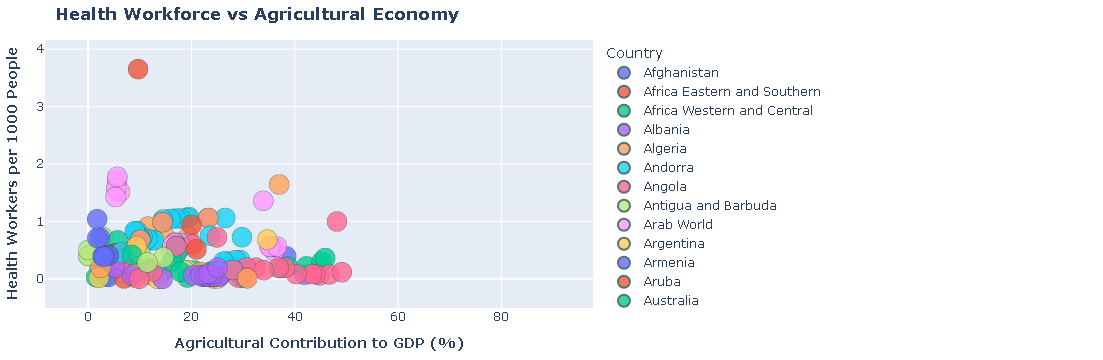

In [39]:
import plotly.express as px

# First, rename long column names for cleaner code
clean_df = pivot_df.rename(columns={
    'AgricultureforestryandfishingvalueaddedofGDP': 'Agri_GDP',
    'Communityhealthworkersper1000people': 'Health_Workers'
})

# Create the visualization
fig = px.scatter(
    clean_df,
    x='Agri_GDP',
    y='Health_Workers',
    color='CountryName',
    size='Year',
    hover_name='CountryName',
    hover_data=['Year'],
    title="<b>Health Workforce vs Agricultural Economy</b>",
    labels={
        'Agri_GDP': 'Agriculture (% of GDP)',
        'Health_Workers': 'Health Workers (per 1000 people)',
        'CountryName': 'Country'
    }
)

# Improve layout
fig.update_layout(
    legend_title_text='Country',
    xaxis_title="<b>Agricultural Contribution to GDP (%)</b>",
    yaxis_title="<b>Health Workers per 1000 People</b>",
    hovermode='closest',
    margin=dict(t=40, b=20, l=20, r=20)
)

# Customize marker appearance
fig.update_traces(
    marker=dict(
        line=dict(width=0.5, color='DarkSlateGrey'),
        opacity=0.8
    )
)

fig.show()

Remaining rows: 204
         Agri_GDP  Health_Workers
count  204.000000      204.000000
mean    17.093959        0.427540
std     12.204150        0.428376
min      0.031521        0.000000
25%      5.945297        0.125750
50%     16.323201        0.363500
75%     24.956552        0.599000
max     49.107100        3.654000
Model R²: 0.02


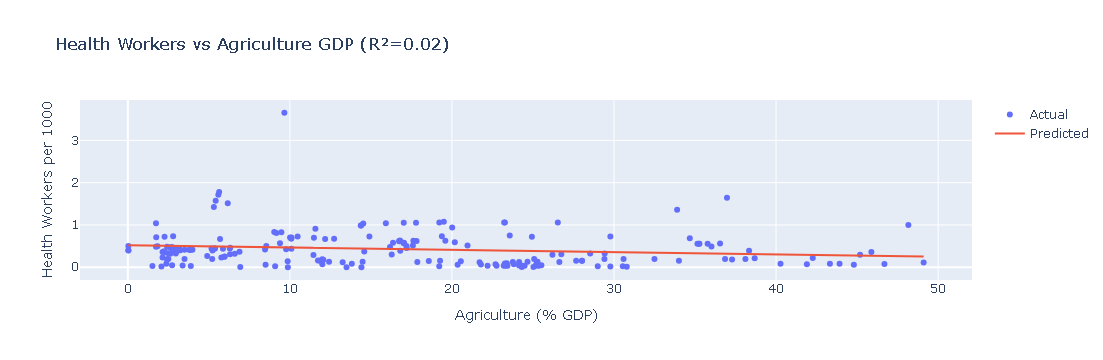

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Handle Missing Values
clean_df = clean_df.dropna(subset=['Agri_GDP', 'Health_Workers'])  # Remove rows with NaN in key columns

# 2. Verify Clean Data
print(f"Remaining rows: {len(clean_df)}")
print(clean_df[['Agri_GDP', 'Health_Workers']].describe())

# 3. Train Model
X = clean_df[['Agri_GDP']]
y = clean_df['Health_Workers']

model = LinearRegression()
model.fit(X, y)

# 4. Evaluate & Store Results
clean_df['Predicted'] = model.predict(X)
r2 = r2_score(y, clean_df['Predicted'])
print(f"Model R²: {r2:.2f}")

# 5. Visualize Results
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=clean_df['Agri_GDP'],
    y=clean_df['Health_Workers'],
    mode='markers',
    name='Actual'
))
fig.add_trace(go.Scatter(
    x=clean_df['Agri_GDP'],
    y=clean_df['Predicted'],
    mode='lines',
    name='Predicted'
))
fig.update_layout(
    title=f"Health Workers vs Agriculture GDP (R²={r2:.2f})",
    xaxis_title="Agriculture (% GDP)",
    yaxis_title="Health Workers per 1000"
)
fig.show()

In [42]:
# Export the final cleaned data with predictions
final_df = clean_df[[
    'CountryName', 
    'Year',
    'Agri_GDP', 
    'Health_Workers',
    'Predicted'
]]
final_df.to_csv("final_analysis_data.csv", index=False)

print("Data exported for Power BI. Columns:", final_df.columns.tolist())

Data exported for Power BI. Columns: ['CountryName', 'Year', 'Agri_GDP', 'Health_Workers', 'Predicted']


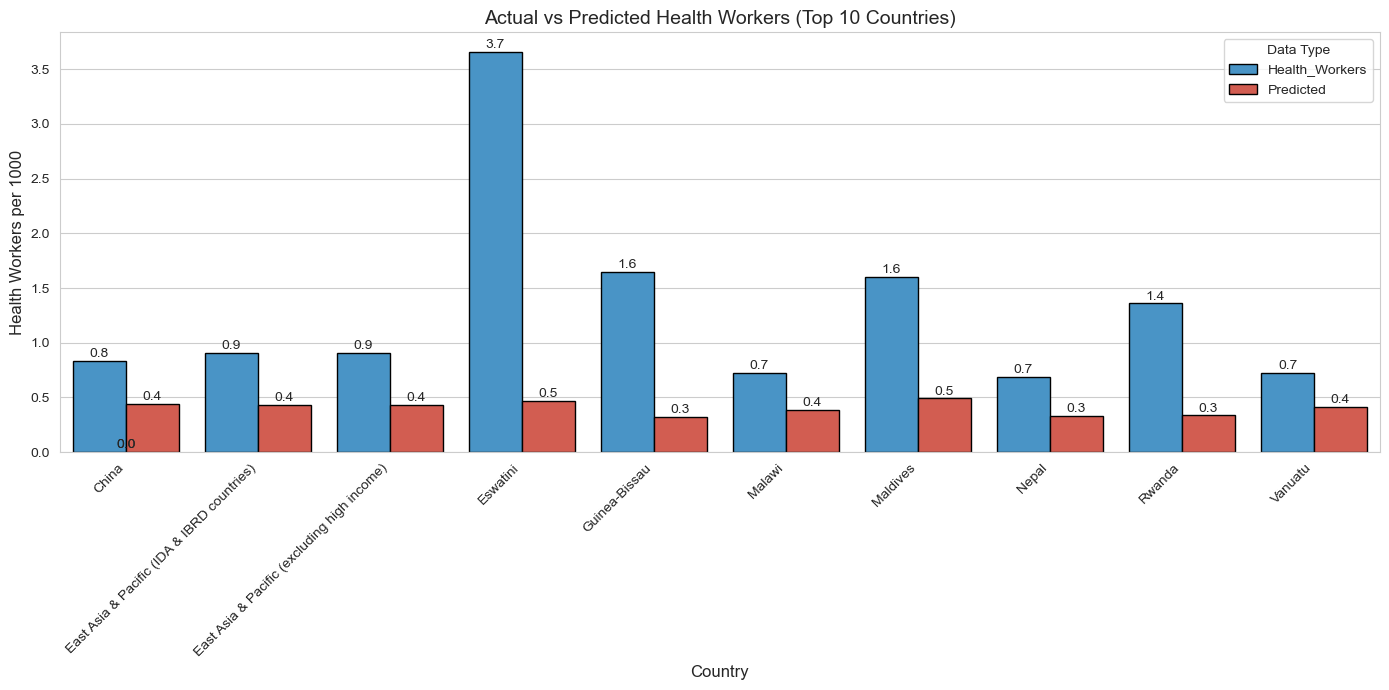

In [45]:
# Prepare data for top 10 countries
top_countries = df.groupby('CountryName')['Health_Workers'].mean().nlargest(10).index
plot_df = df[df['CountryName'].isin(top_countries)].melt(
    id_vars=['CountryName'],
    value_vars=['Health_Workers', 'Predicted'],
    var_name='Type',
    value_name='Count'
)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=plot_df,
    x='CountryName',
    y='Count',
    hue='Type',
    palette=['#3498db', '#e74c3c'],  # Blue for actual, red for predicted
    edgecolor='black',
    errorbar=None
)

# Customize
plt.title("Actual vs Predicted Health Workers (Top 10 Countries)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Health Workers per 1000", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Data Type')

# Add value labels
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.1f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300)
plt.show()

In [46]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Verify data ranges
print("\nHealth Workers range:", df['Health_Workers'].min(), "-", df['Health_Workers'].max())

Missing values:
 CountryName       0
Year              0
Agri_GDP          0
Health_Workers    0
Predicted         0
dtype: int64

Health Workers range: 0.0 - 3.654


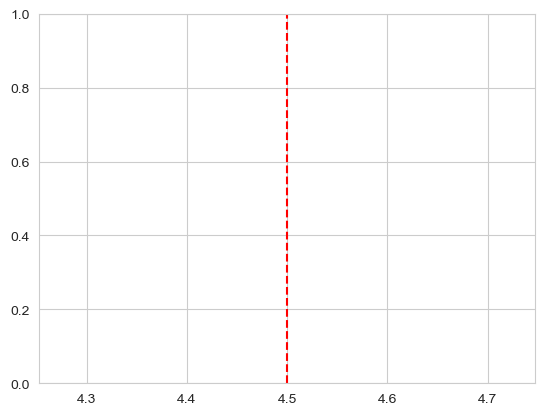

In [47]:
# Add reference line (e.g., WHO recommended minimum)
plt.axvline(x=4.5, color='red', linestyle='--', label='WHO Recommended Minimum')

# Highlight specific countries
highlight = ['Rwanda', 'South Africa']
for i, country in enumerate(plot_df['CountryName']):
    if country in highlight:
        ax.patches[i].set_facecolor('#e74c3c')  # Red highlight

In [48]:
# Add caption
plt.figtext(0.5, -0.05, 
            "Source: World Bank (2023) | Analysis by [Your Name]", 
            ha="center", fontsize=10, color='gray')

Text(0.5, -0.05, 'Source: World Bank (2023) | Analysis by [Your Name]')

<Figure size 640x480 with 0 Axes>

In [49]:
# Auto-adjust height based on country count
n_countries = len(plot_df)
plt.figure(figsize=(10, n_countries * 0.4))  # 0.4 inches per bar

<Figure size 1000x2800 with 0 Axes>

<Figure size 1000x2800 with 0 Axes>

Data Summary:
               Year    Agri_GDP  Health_Workers   Predicted
count   204.000000  204.000000      204.000000  204.000000
mean   2005.078431   17.093959        0.427540    0.427540
std       6.269303   12.204150        0.428376    0.067183
min    1990.000000    0.031521        0.000000    0.251309
25%    2001.000000    5.945297        0.125750    0.384257
50%    2006.000000   16.323201        0.363500    0.431783
75%    2010.000000   24.956552        0.599000    0.488913
max    2016.000000   49.107100        3.654000    0.521468


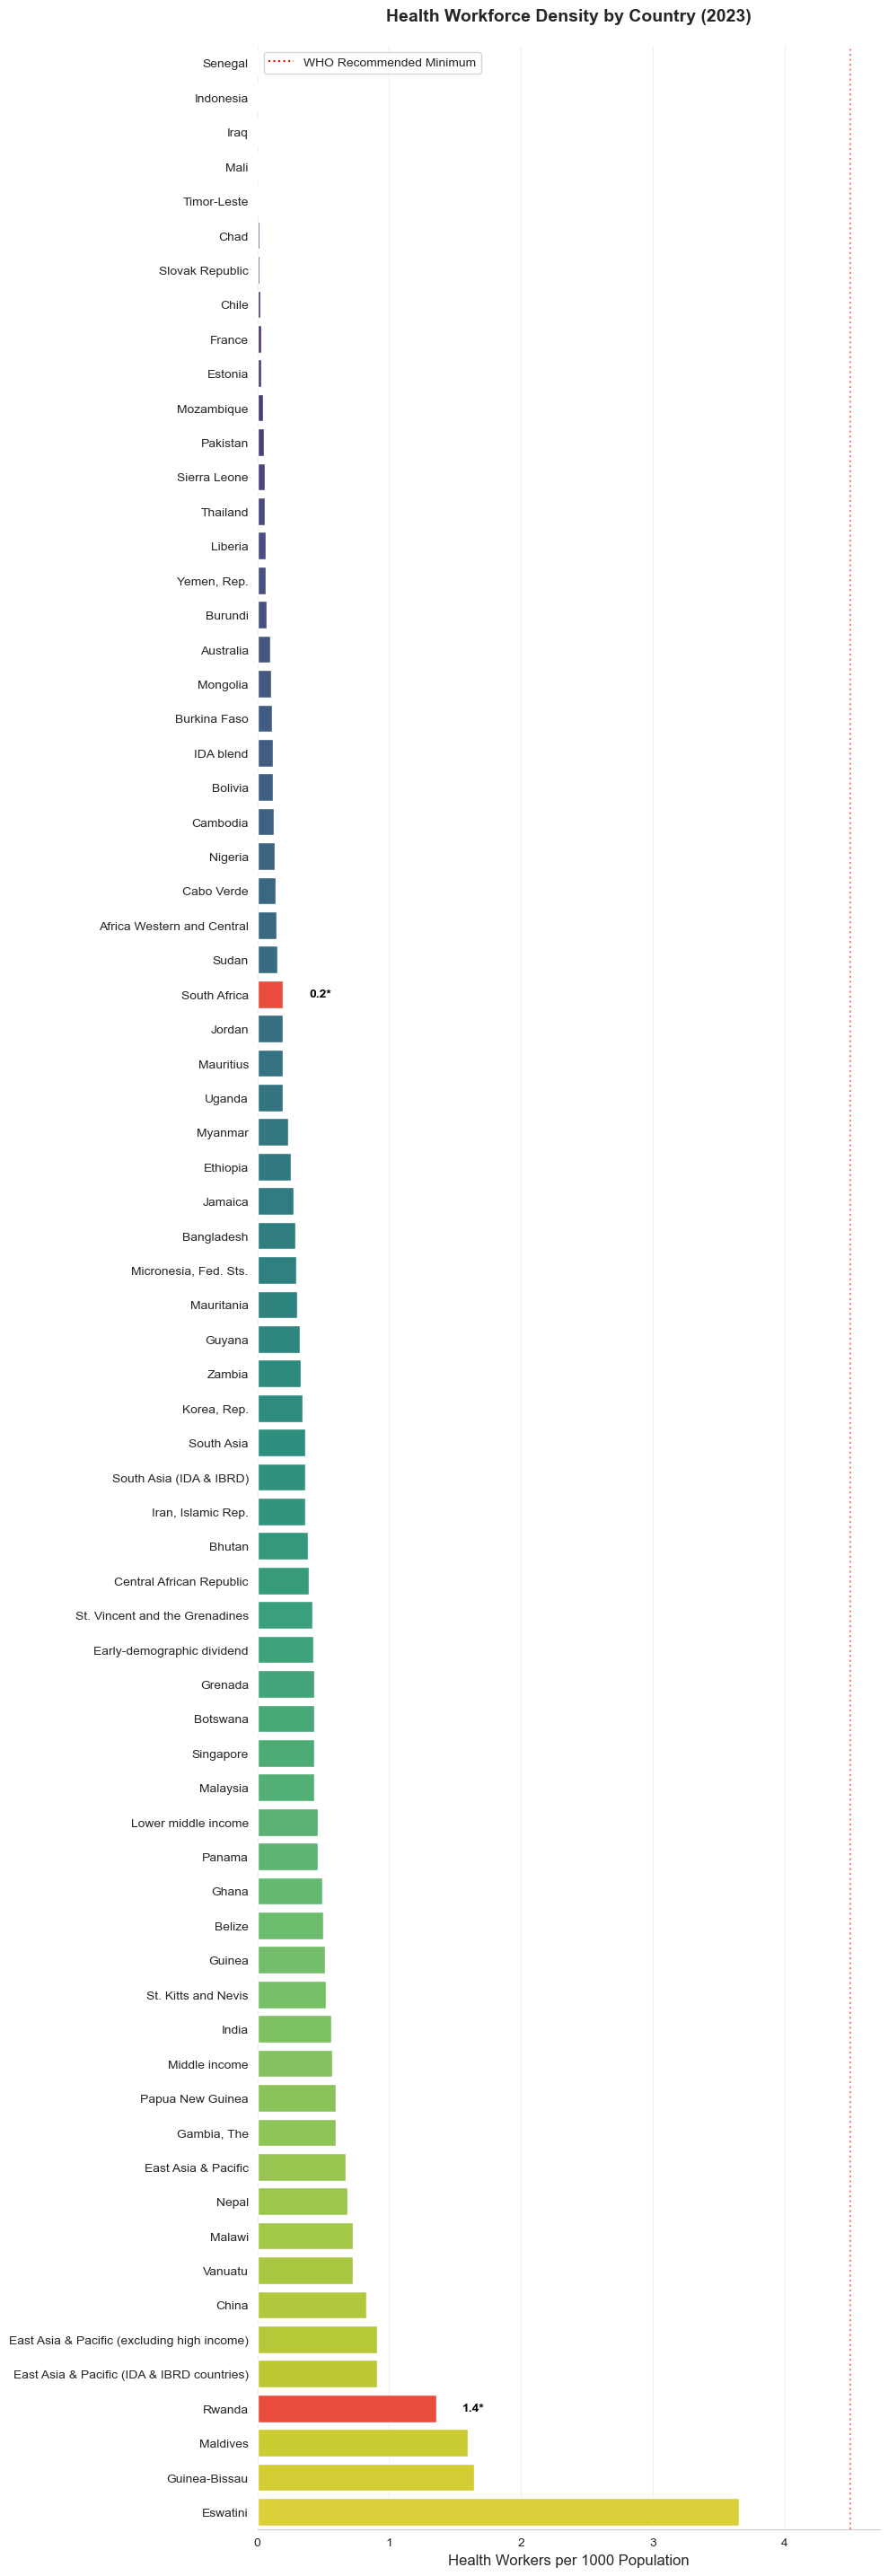

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and validate
df = pd.read_csv("final_analysis_data.csv")
print("Data Summary:\n", df.describe())

# Prepare data
plot_df = df.groupby('CountryName')['Health_Workers'].mean().sort_values().reset_index()

# Create figure
plt.figure(figsize=(10, len(plot_df)*0.4))
ax = sns.barplot(
    data=plot_df,
    x='Health_Workers',
    y='CountryName',
    hue='CountryName',
    palette='viridis',
    legend=False
)

# Enhancements
plt.title("Health Workforce Density by Country (2023)", 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Health Workers per 1000 Population", fontsize=12)
plt.ylabel("")  # Remove 'CountryName' label

# Reference lines and highlights
plt.axvline(x=4.5, color='red', linestyle=':', alpha=0.5, label='WHO Minimum')
highlight_countries = ['Rwanda', 'South Africa']
for i, country in enumerate(plot_df['CountryName']):
    if country in highlight_countries:
        ax.patches[i].set_facecolor('#e74c3c')
        ax.text(plot_df.loc[i, 'Health_Workers']+0.2, i, 
                f"{plot_df.loc[i, 'Health_Workers']:.1f}*", 
                va='center', color='black', fontweight='bold')

# Final touches
sns.despine(left=True)
plt.grid(axis='x', alpha=0.3)
plt.legend([plt.Line2D([0], [0], color='red', linestyle=':')], 
           ['WHO Recommended Minimum'])
plt.tight_layout()

# Save
plt.savefig('enhanced_health_workers.png', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
import pandas as pd

# Correct loading for World Bank CSVs
df = pd.read_csv("WB_COVID_GDP.csv", skiprows=4)  # Skip metadata rows
df = df.dropna(how='all', axis=1)  # Remove empty columns

# Verify columns
print("Available columns:", df.columns.tolist())

Available columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
